In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
import warnings
warnings.filterwarnings('ignore')

In [39]:
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from scipy.stats import zscore
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier,GradientBoostingRegressor,ExtraTreesClassifier,ExtraTreesRegressor,AdaBoostClassifier,AdaBoostRegressor,BaggingClassifier,BaggingRegressor
from sklearn.metrics import RocCurveDisplay,roc_auc_score,accuracy_score,mean_absolute_error,mean_squared_error, r2_score, classification_report, confusion_matrix,auc, roc_curve
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

In [2]:
df = pd.read_csv('temperature.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [3]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


Text(0.5, 1.0, 'Distribution of Present Tmax and Tmin')

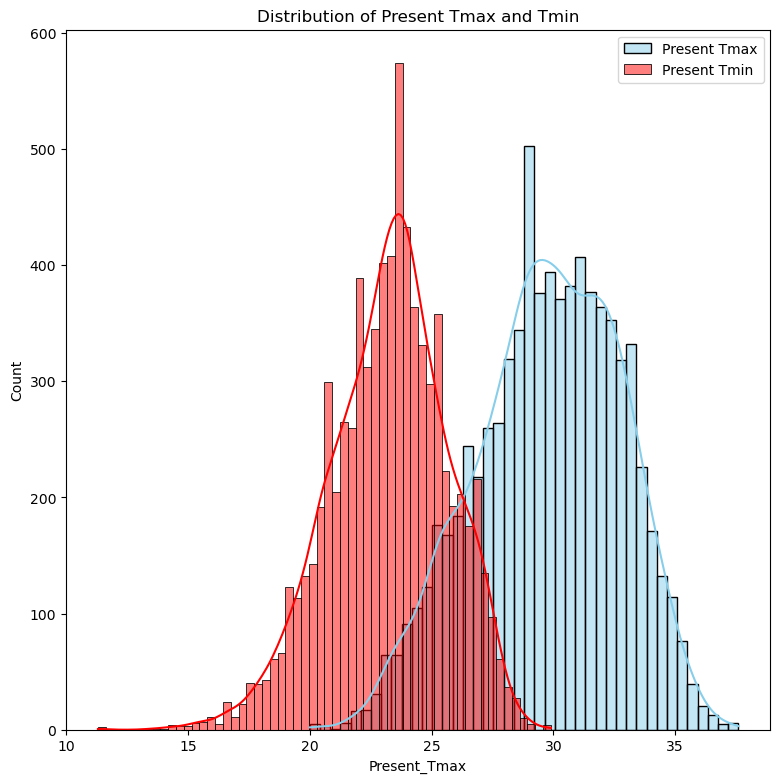

In [5]:
plt.figure( figsize = (20, 20))
plt.subplot(2, 2, 1)
sns.histplot(df['Present_Tmax'], color='skyblue', label='Present Tmax', kde=True)
sns.histplot(df['Present_Tmin'], color='red', label='Present Tmin', kde=True)
plt.legend()
plt.title('Distribution of Present Tmax and Tmin')

* The histogram shows the distribution of present maximum (blue) and minimum (red) temperatures.

Text(0.5, 1.0, 'Distribution of Next Day Tmax and Tmin')

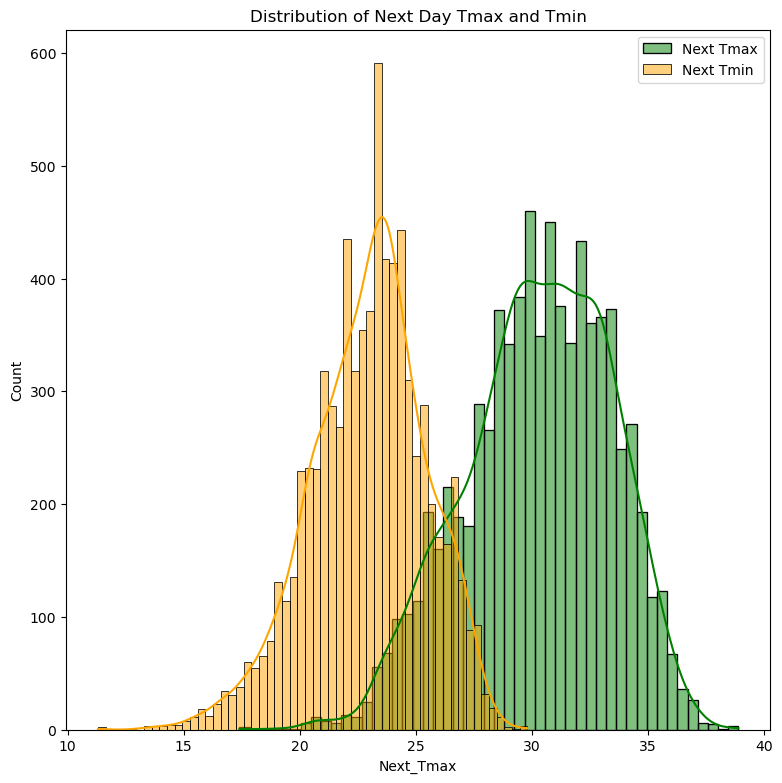

In [6]:
plt.figure( figsize = (20, 20))
plt.subplot(2, 2, 2)
sns.histplot(df['Next_Tmax'], color='green', label='Next Tmax', kde=True)
sns.histplot(df['Next_Tmin'], color='orange', label='Next Tmin', kde=True)
plt.legend()
plt.title('Distribution of Next Day Tmax and Tmin')

* The histogram displays the distribution of next day's maximum (green) and minimum (orange) temperatures.

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_68464\1026110106.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


(array([15340., 15706., 16071., 16436., 16801., 17167., 17532.]),
 [Text(15340.0, 0, '2012'),
  Text(15706.0, 0, '2013'),
  Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017'),
  Text(17532.0, 0, '2018')])

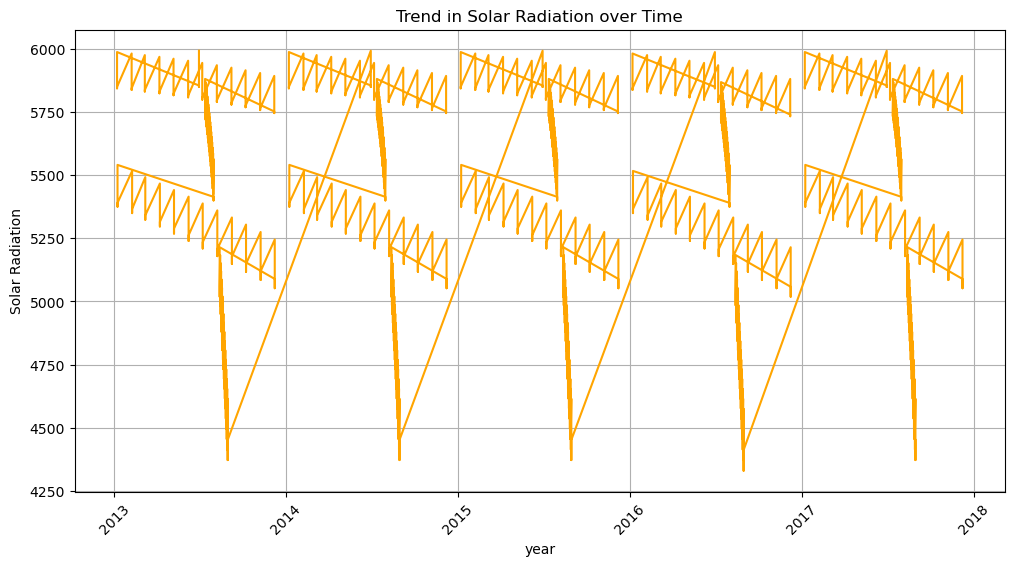

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Solar radiation'], color='orange')
plt.title('Trend in Solar Radiation over Time')
plt.xlabel('year')
plt.ylabel('Solar Radiation')
plt.grid(True)
plt.xticks(rotation=45)


* The plot illustrates the variation in solar radiation across the dates provided in the dataset. It shows how solar radiation fluctuates over time, which influenced by various factors such as seasonal changes, cloud cover, and atmospheric conditions.



In [8]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaT,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [9]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [10]:
df.isnull().sum()


station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [13]:
df['station'].iloc[7750] = 1.0
df['station'].iloc[7751] = 2.0
df['Date'].iloc[7750] = '31-08-2017'
df['Date'].iloc[7751] = '31-08-2017'

In [14]:
ccol = df.select_dtypes(include=['object']).columns
print("Categorical columns are:", ccol)
print("\n")

ncol = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns are:", ncol)

Categorical columns are: Index([], dtype='object')


Numerical columns are: Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')


In [15]:
df["Date"] = pd.to_datetime(df["Date"])
print("Minimum date:", df["Date"].min())
print("Maximum date:", df["Date"].max())

Minimum date: 2013-01-07 00:00:00
Maximum date: 2017-12-08 00:00:00


In [16]:
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.head(2)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013


In [18]:
df = df.apply(lambda col: col.fillna(col.mean()) if col.name not in ['station', 'date'] else col)

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
station,7752.0,12.997033,7.213007,1.000000,7.000000,13.000000,19.000000,25.000000
Present_Tmax,7752.0,29.768211,2.956557,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7752.0,23.225059,2.403036,11.300000,21.700000,23.400000,24.900000,29.900000
LDAPS_RHmin,7752.0,56.759372,14.596973,19.794666,46.046162,55.313244,67.038254,98.524734
LDAPS_RHmax,7752.0,88.374804,7.157124,58.936283,84.316923,89.699505,93.704500,100.000153
LDAPS_Tmax_lapse,7752.0,29.613447,2.932898,17.624954,27.693091,29.662273,31.683819,38.542255
LDAPS_Tmin_lapse,7752.0,23.512589,2.333973,14.272646,22.114651,23.735942,25.134000,29.619342
LDAPS_WS,7752.0,7.097875,2.173245,2.882580,5.686487,6.563068,8.007471,21.857621
LDAPS_LH,7752.0,62.505019,33.567001,-13.603212,37.532764,57.310630,83.904586,213.414006
LDAPS_CC1,7752.0,0.368774,0.261185,0.000000,0.148321,0.320110,0.571696,0.967277


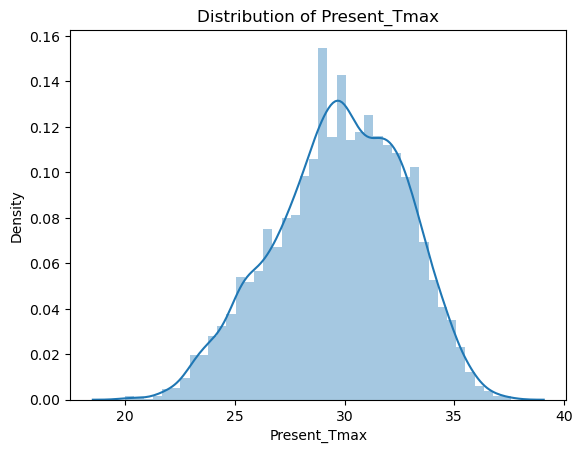

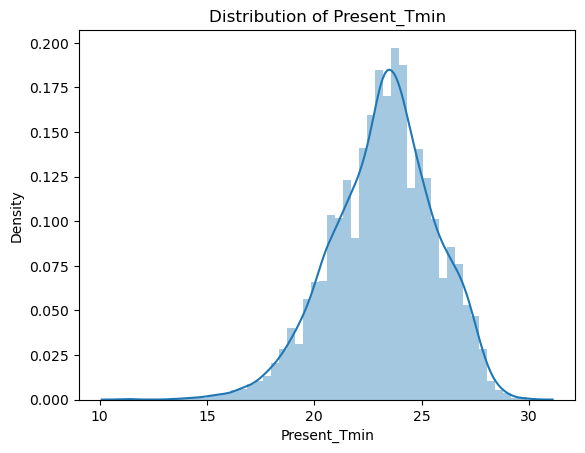

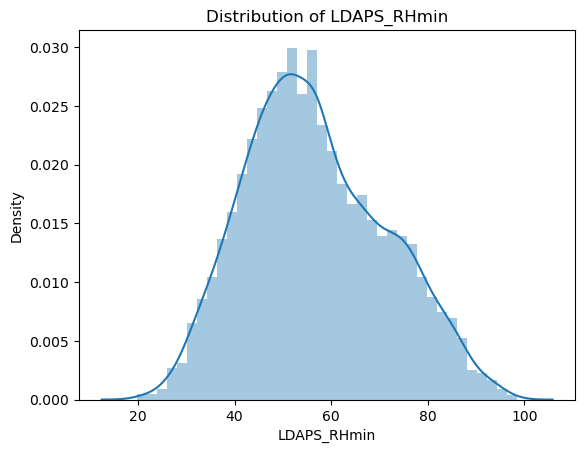

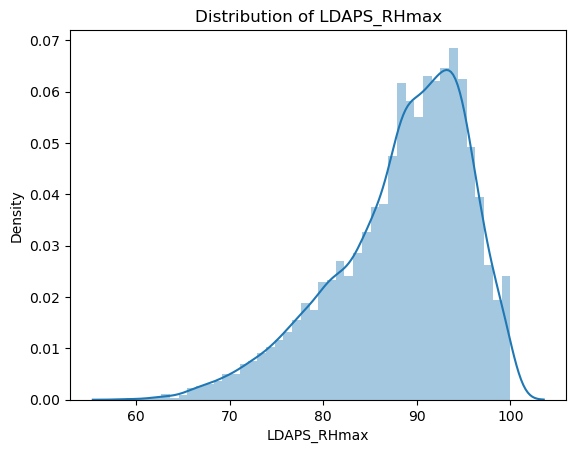

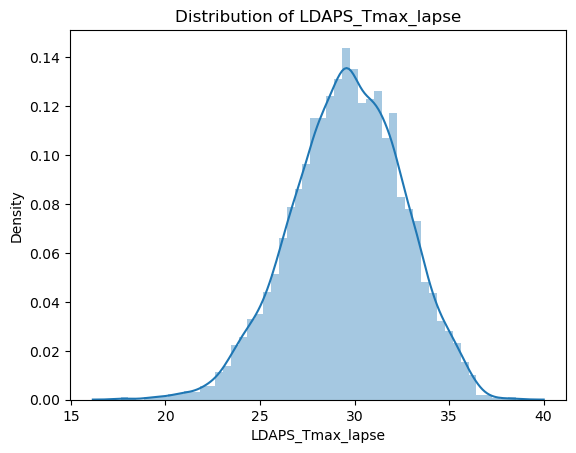

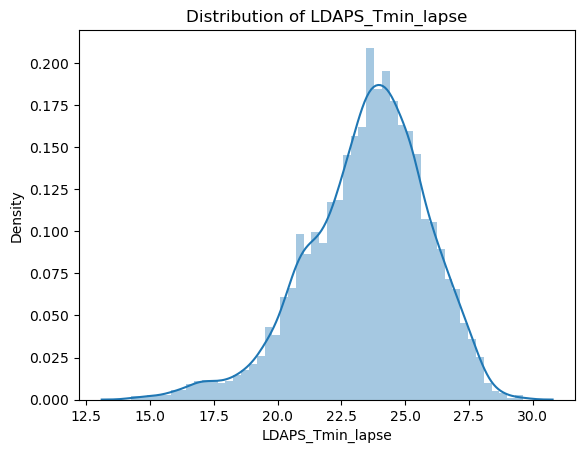

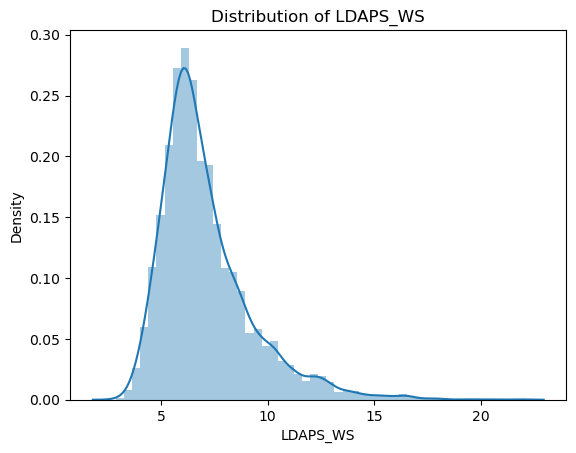

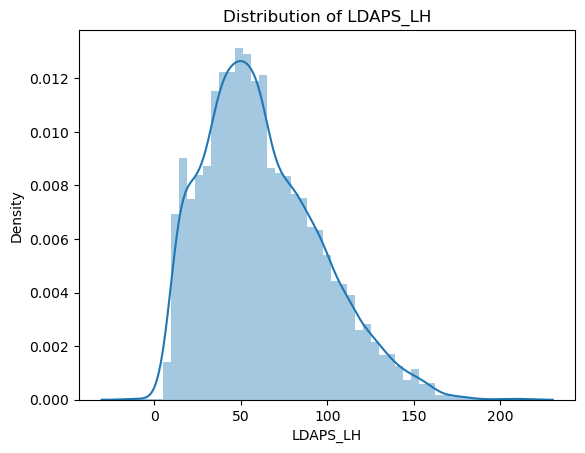

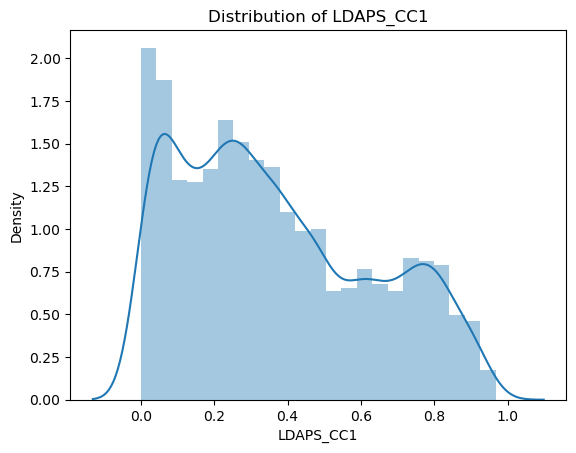

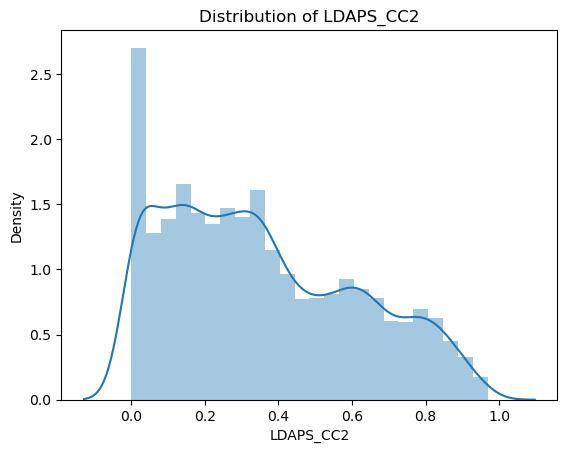

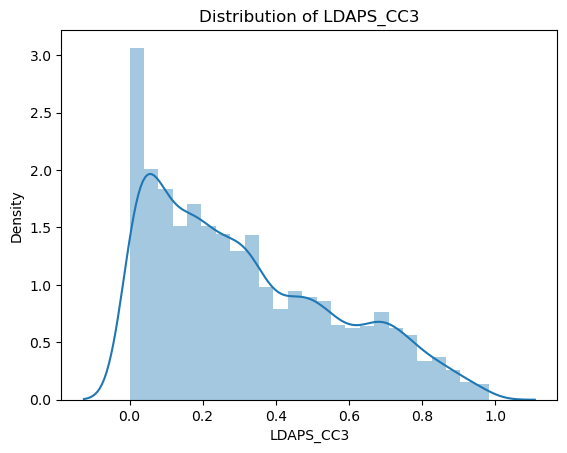

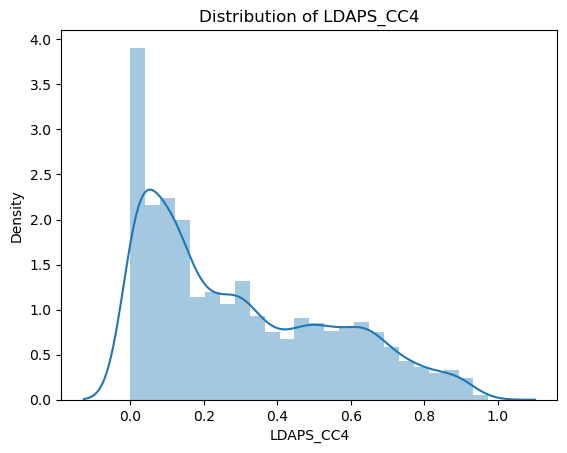

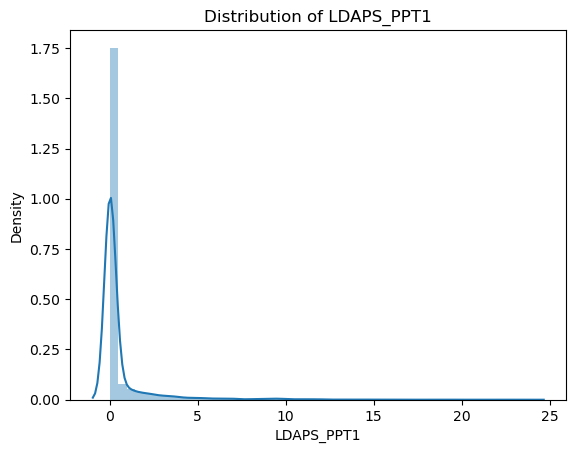

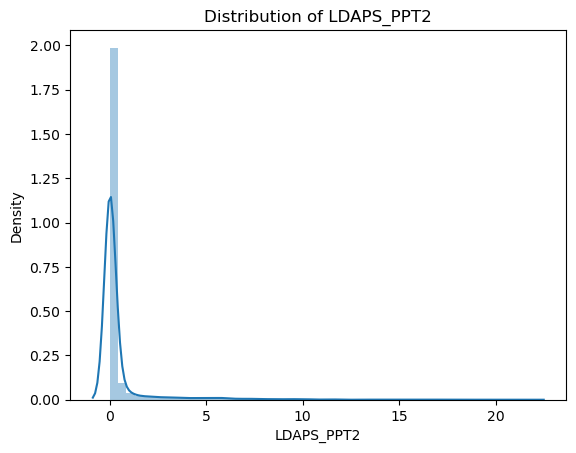

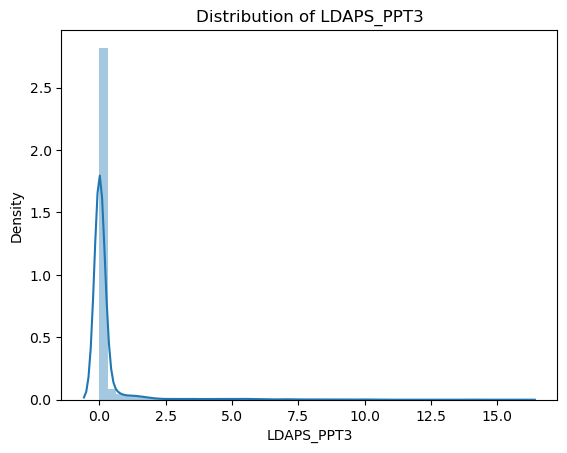

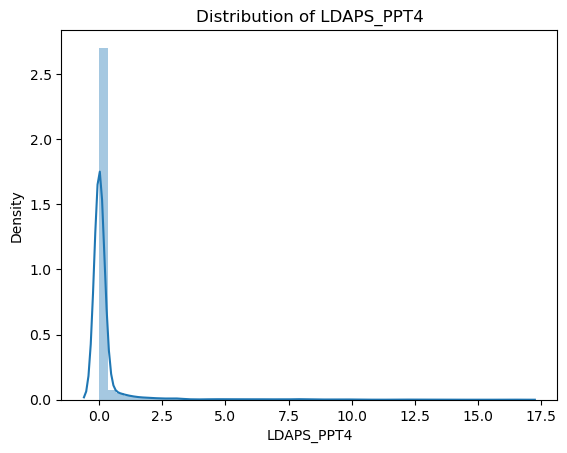

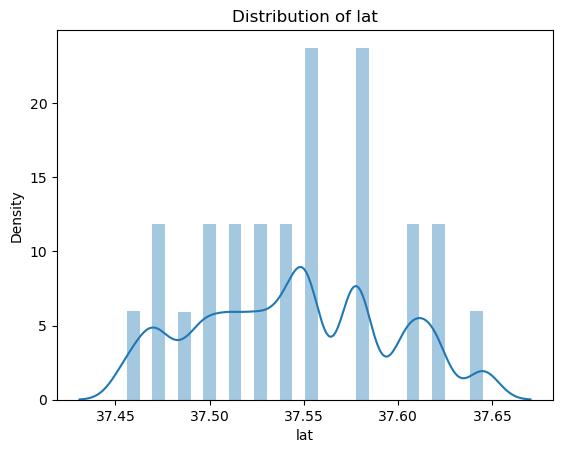

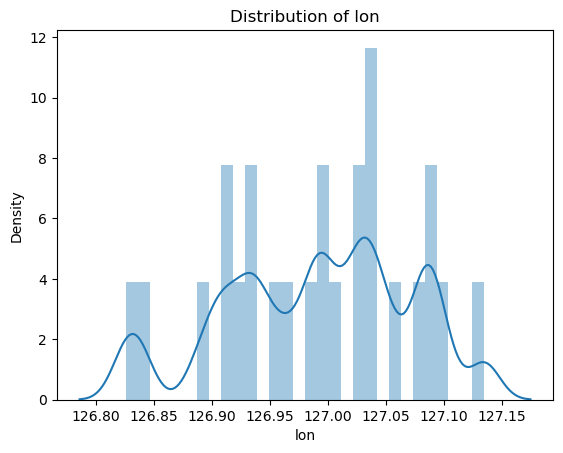

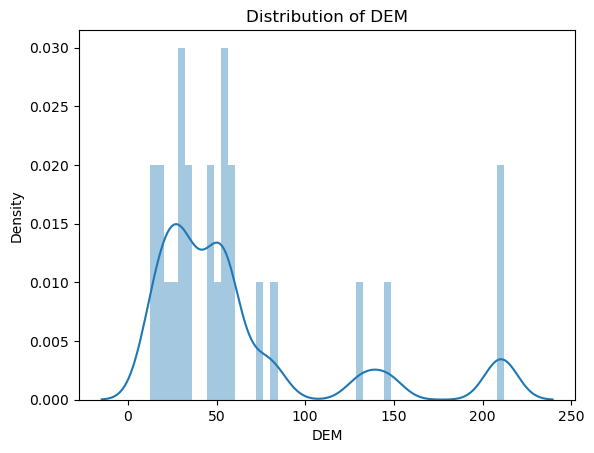

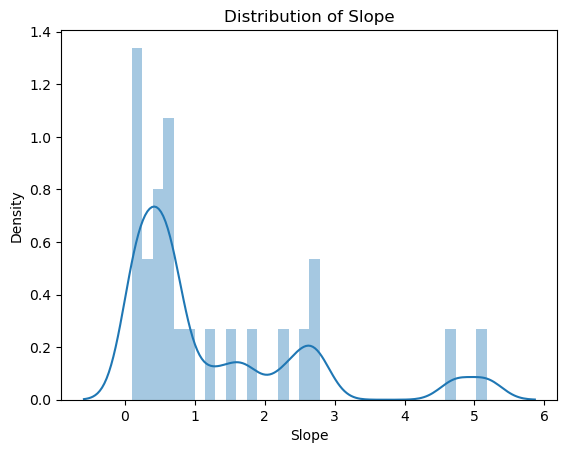

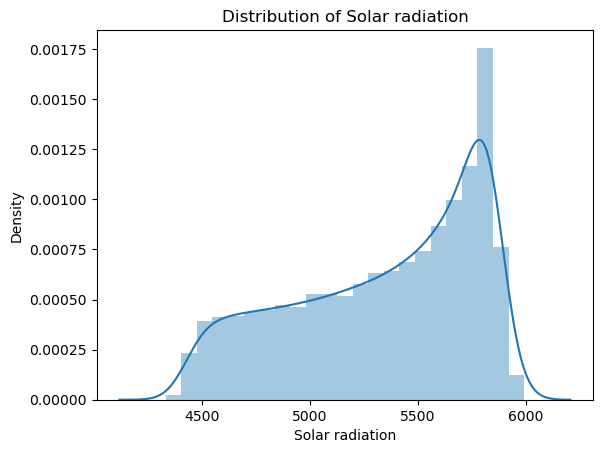

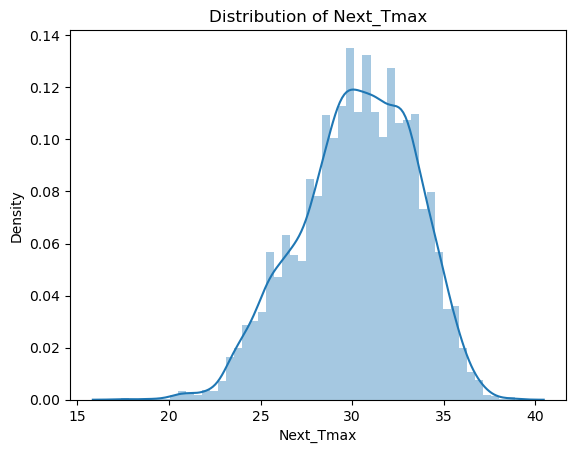

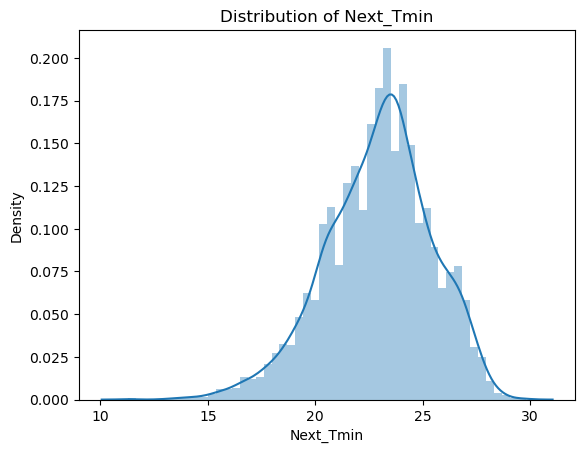

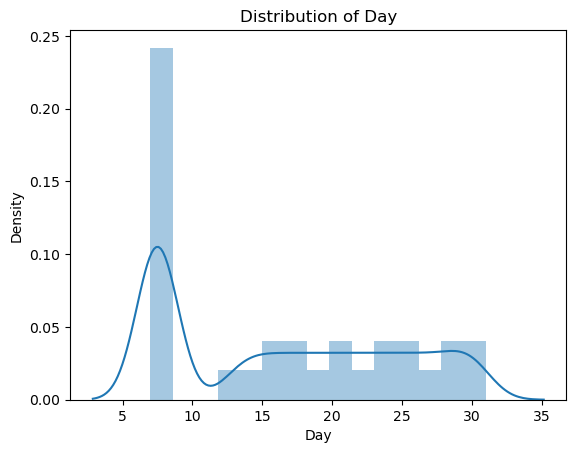

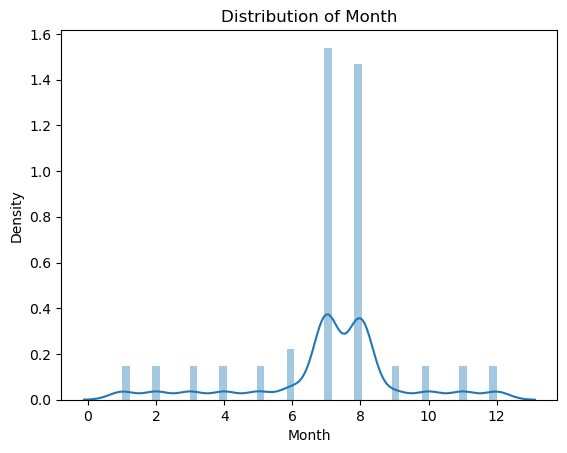

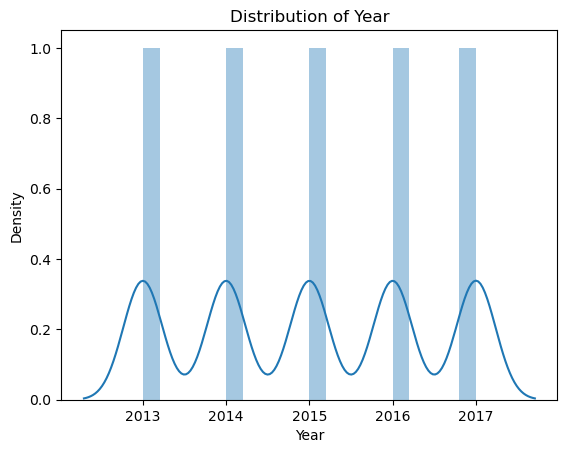

In [20]:
for col in df.columns:
    if col not in ['station', 'date']:
        sns.distplot(df[col])
        plt.title(f'Distribution of {col}')
        plt.show()

In [21]:
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
station,1.000000,0.112806,0.132122,-0.066731,-0.166366,0.069363,0.105059,0.004355,-0.133711,0.006769,...,-0.237438,-0.118574,-0.256095,-0.090413,-0.018787,0.108289,0.128713,-0.000730,-0.000169,-0.000582
Present_Tmax,0.112806,1.000000,0.618760,-0.204571,-0.301787,0.570129,0.623496,-0.121820,0.135463,-0.311805,...,-0.052615,0.009020,-0.187121,-0.105809,-0.025439,0.610348,0.622741,-0.143899,-0.001185,0.059665
Present_Tmin,0.132122,0.618760,1.000000,0.123143,-0.015140,0.464151,0.762993,-0.034675,-0.009258,0.084447,...,-0.078475,-0.043461,-0.250275,-0.146339,0.053578,0.471806,0.796670,-0.108728,-0.003550,0.036987
LDAPS_RHmin,-0.066731,-0.204571,0.123143,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,...,0.087099,-0.076237,0.102115,0.123744,0.244080,-0.437898,0.095019,-0.065735,-0.053922,-0.001984
LDAPS_RHmax,-0.166366,-0.301787,-0.015140,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,...,0.195798,0.025667,0.177168,0.219599,0.149261,-0.283738,-0.071997,-0.013571,-0.040121,-0.142249
LDAPS_Tmax_lapse,0.069363,0.570129,0.464151,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,...,-0.042093,0.090666,-0.178895,-0.162332,0.047971,0.827189,0.586868,-0.160495,-0.021745,0.015978
LDAPS_Tmin_lapse,0.105059,0.623496,0.762993,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,...,-0.096257,-0.026701,-0.195455,-0.185849,0.159975,0.586983,0.880176,-0.178190,-0.027566,-0.004937
LDAPS_WS,0.004355,-0.121820,-0.034675,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,...,0.036657,-0.059466,0.191053,0.171629,0.121759,-0.342729,-0.096576,-0.028012,-0.081029,-0.110444
LDAPS_LH,-0.133711,0.135463,-0.009258,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,...,0.133221,0.025822,0.055133,0.086781,-0.047384,0.157616,-0.055440,-0.011580,-0.022629,0.057469
LDAPS_CC1,0.006769,-0.311805,0.084447,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,...,-0.008131,-0.006843,-0.014090,-0.020752,0.218309,-0.452541,-0.011028,-0.019928,-0.076224,-0.066300


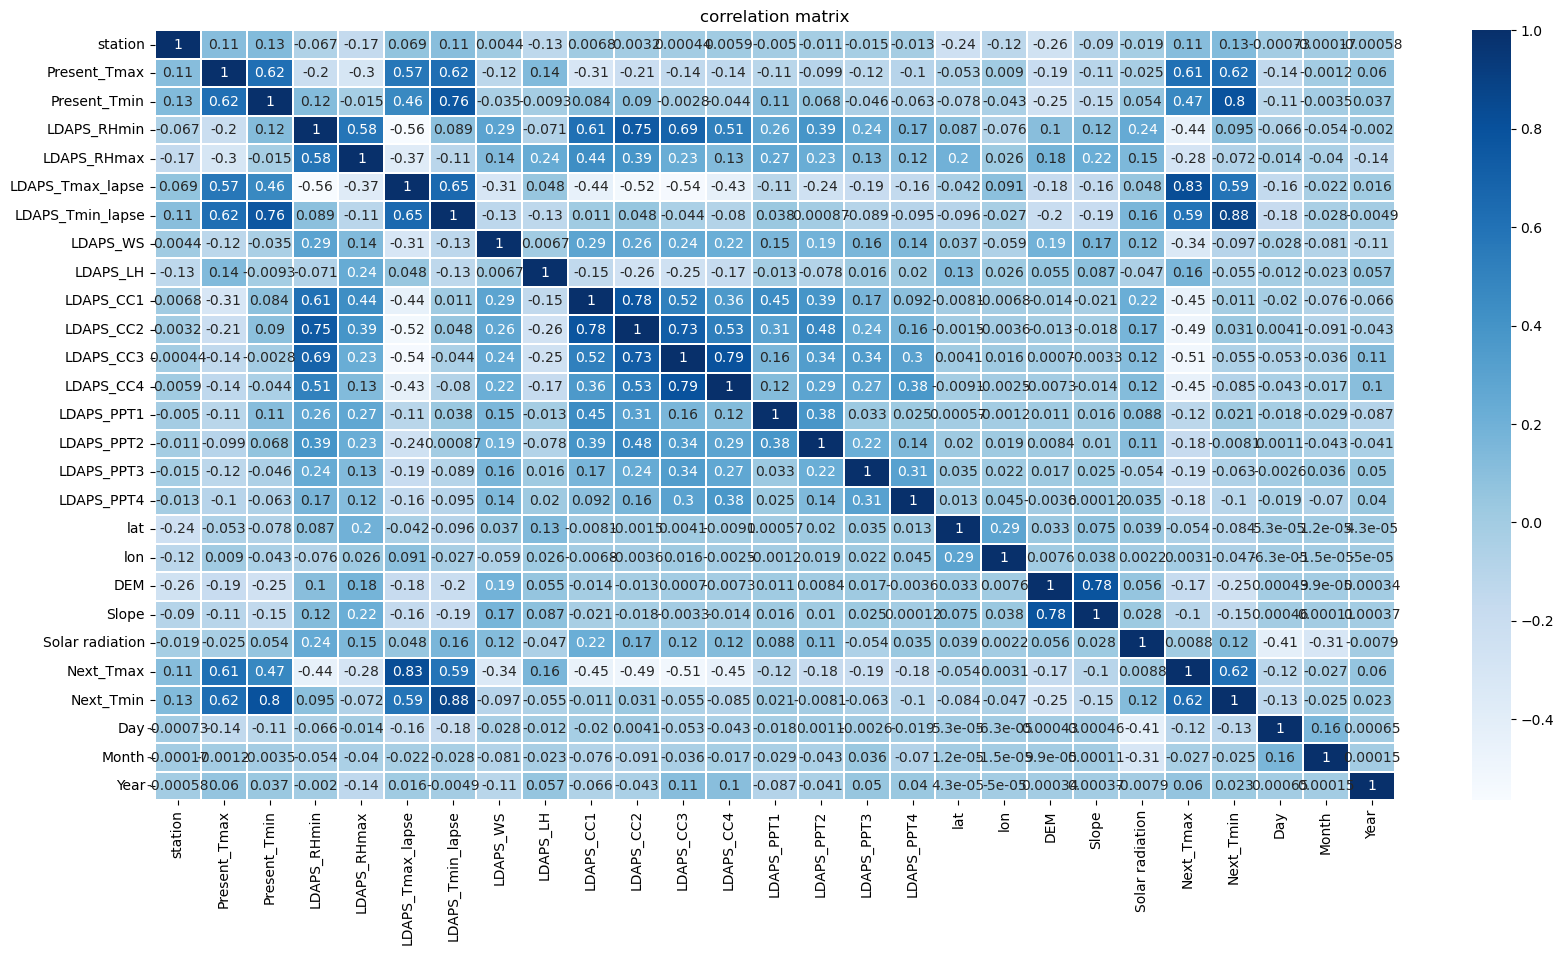

In [22]:
fig=plt.figure(figsize=(20,10))
hc=df.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues",linewidths=.1, annot_kws={"size": 10})
plt.title("correlation matrix")
plt.show()

In [23]:
skew=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4',
      'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']

In [27]:
scaler = PowerTransformer(method='yeo-johnson')

In [28]:
df[skew] = scaler.fit_transform(df[skew].values)

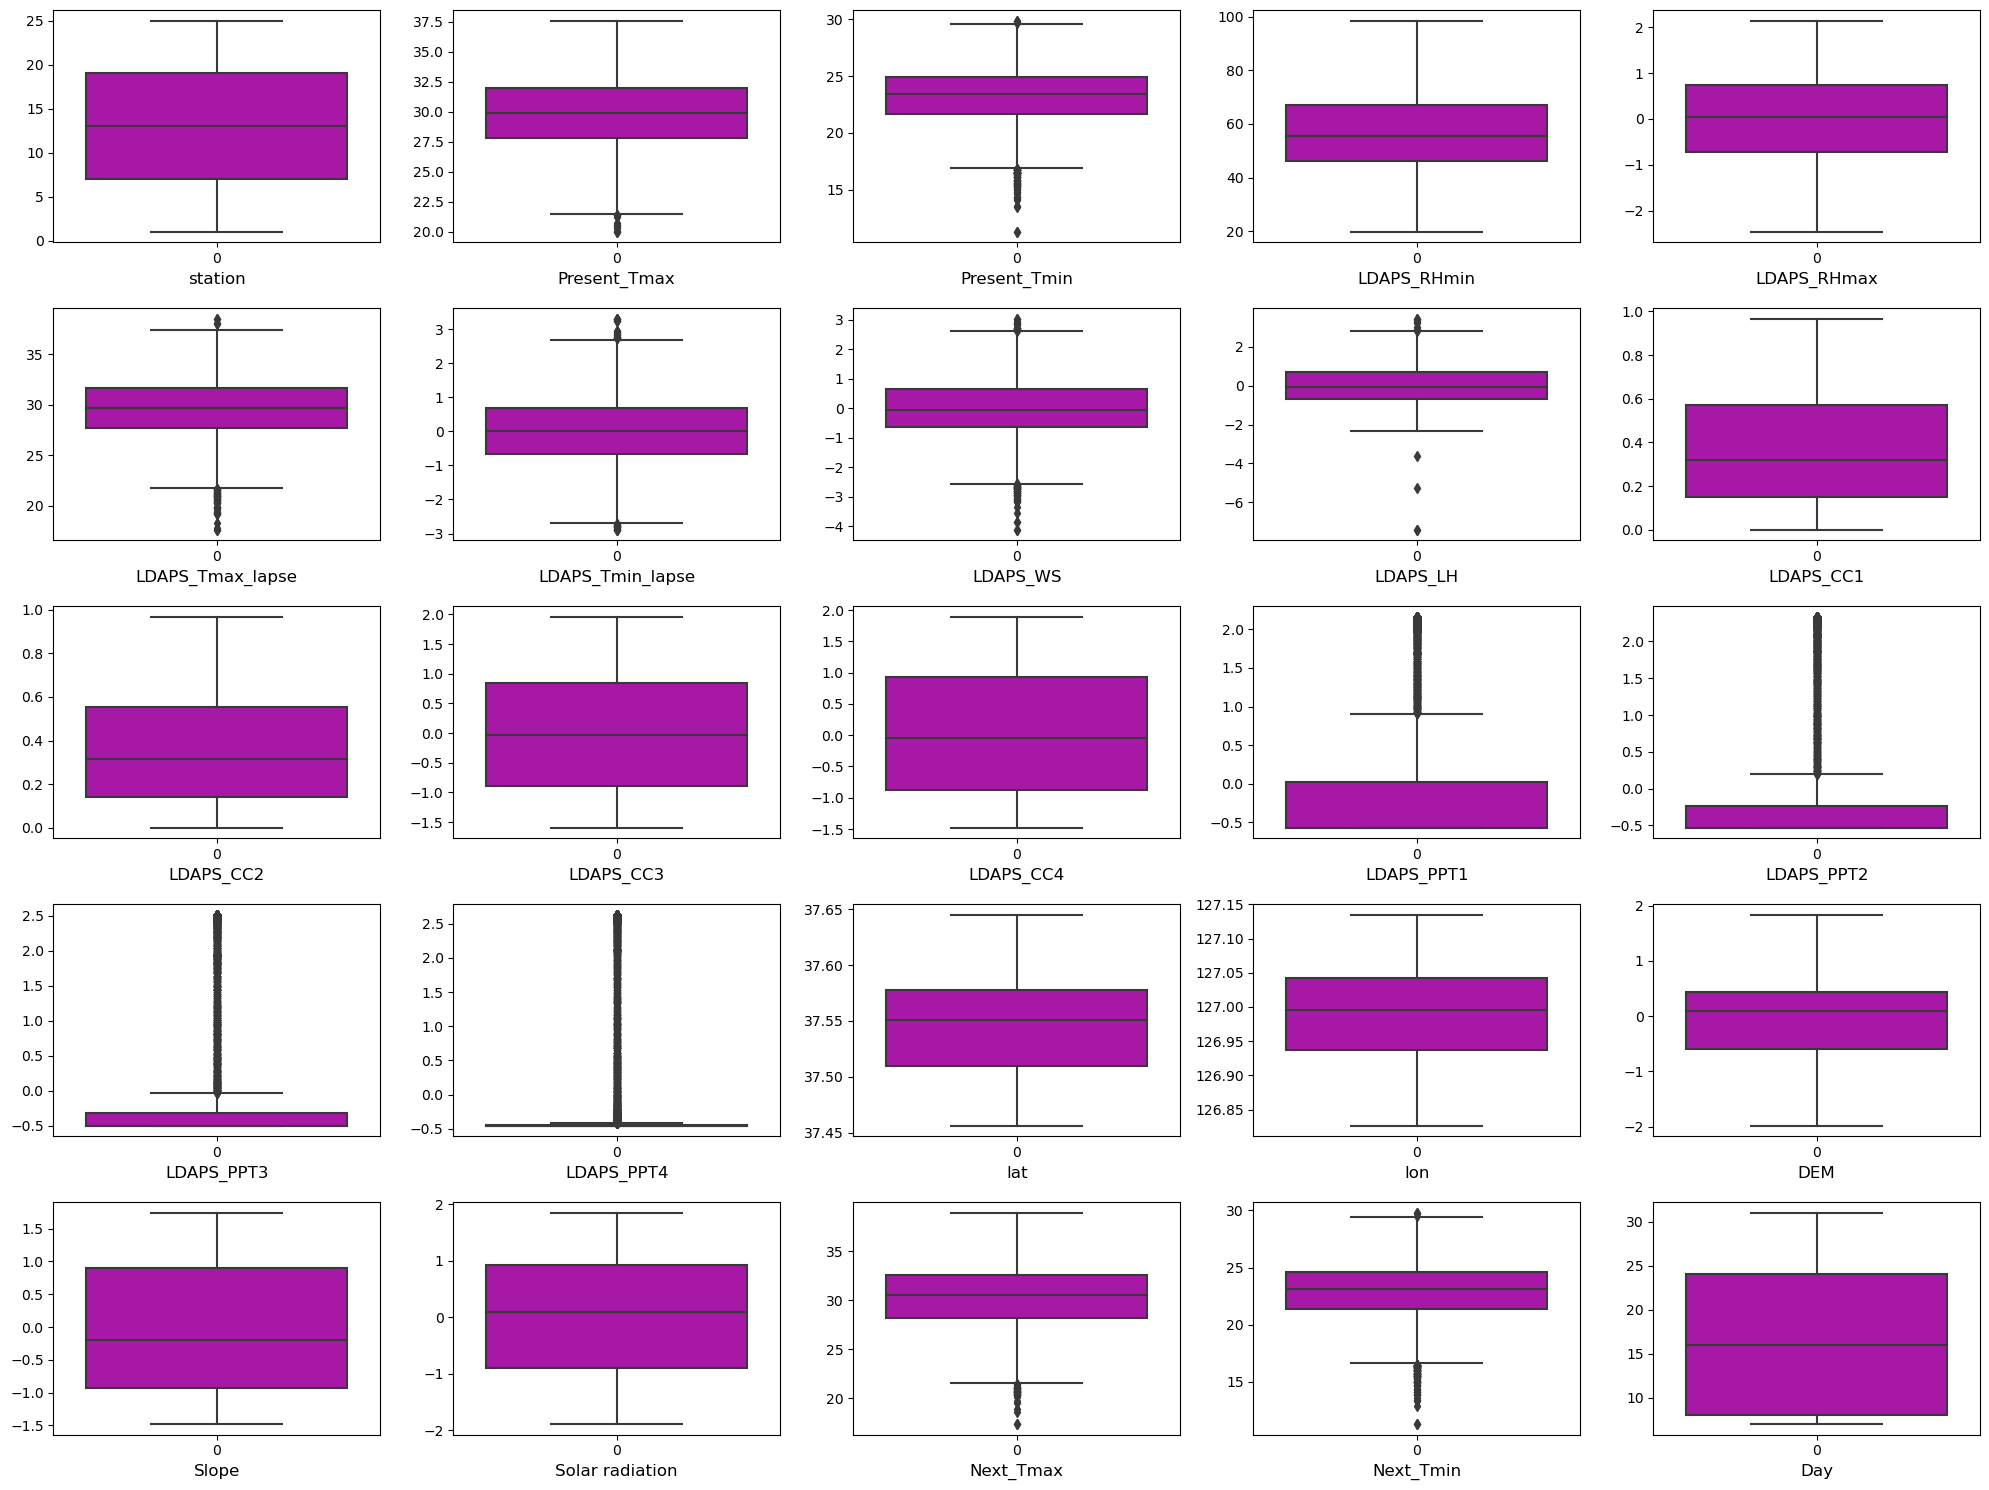

In [29]:
plt.figure(figsize=(20,15),facecolor="white")
pltno=1
for i in df:
    if pltno<=25:
        plt.subplot(5,5,pltno)
        sns.boxplot(df[i],color="m")
        plt.xlabel(i,fontsize=12)
    pltno+=1
plt.tight_layout()

In [32]:
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]

In [33]:
df=df1

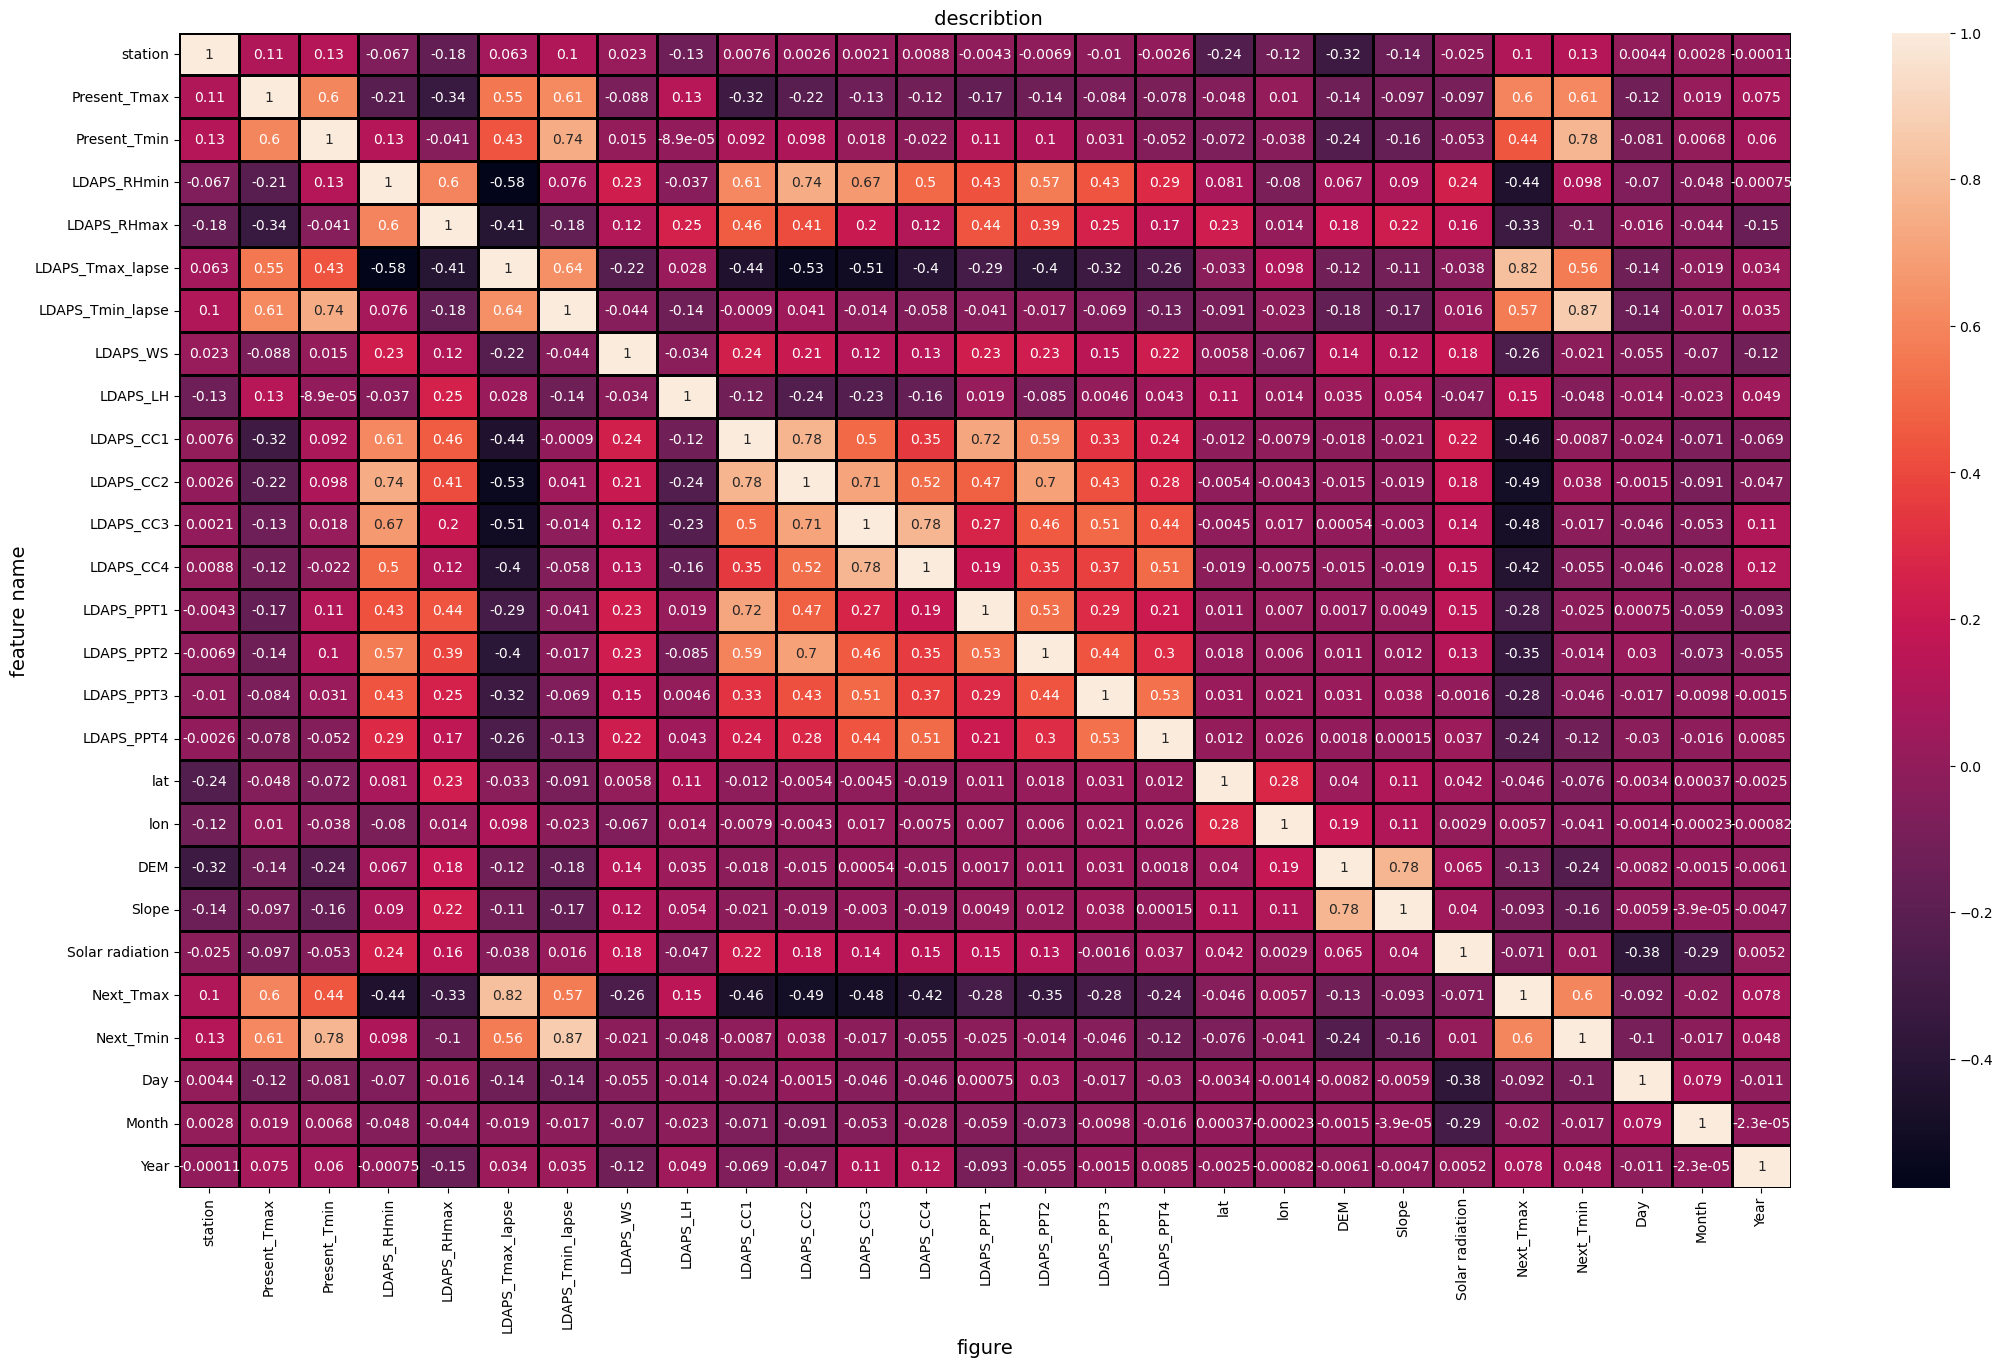

In [34]:
plt.figure(figsize = (26, 15))
sns.heatmap(df.corr(),linewidths=0.8,fmt='.2g',linecolor="black",annot=True)
plt.xlabel('figure',fontsize=14)
plt.ylabel("feature name",fontsize=14)
plt.title(" describtion",fontsize=14)
plt.show()

# target  :'Next_Tmax

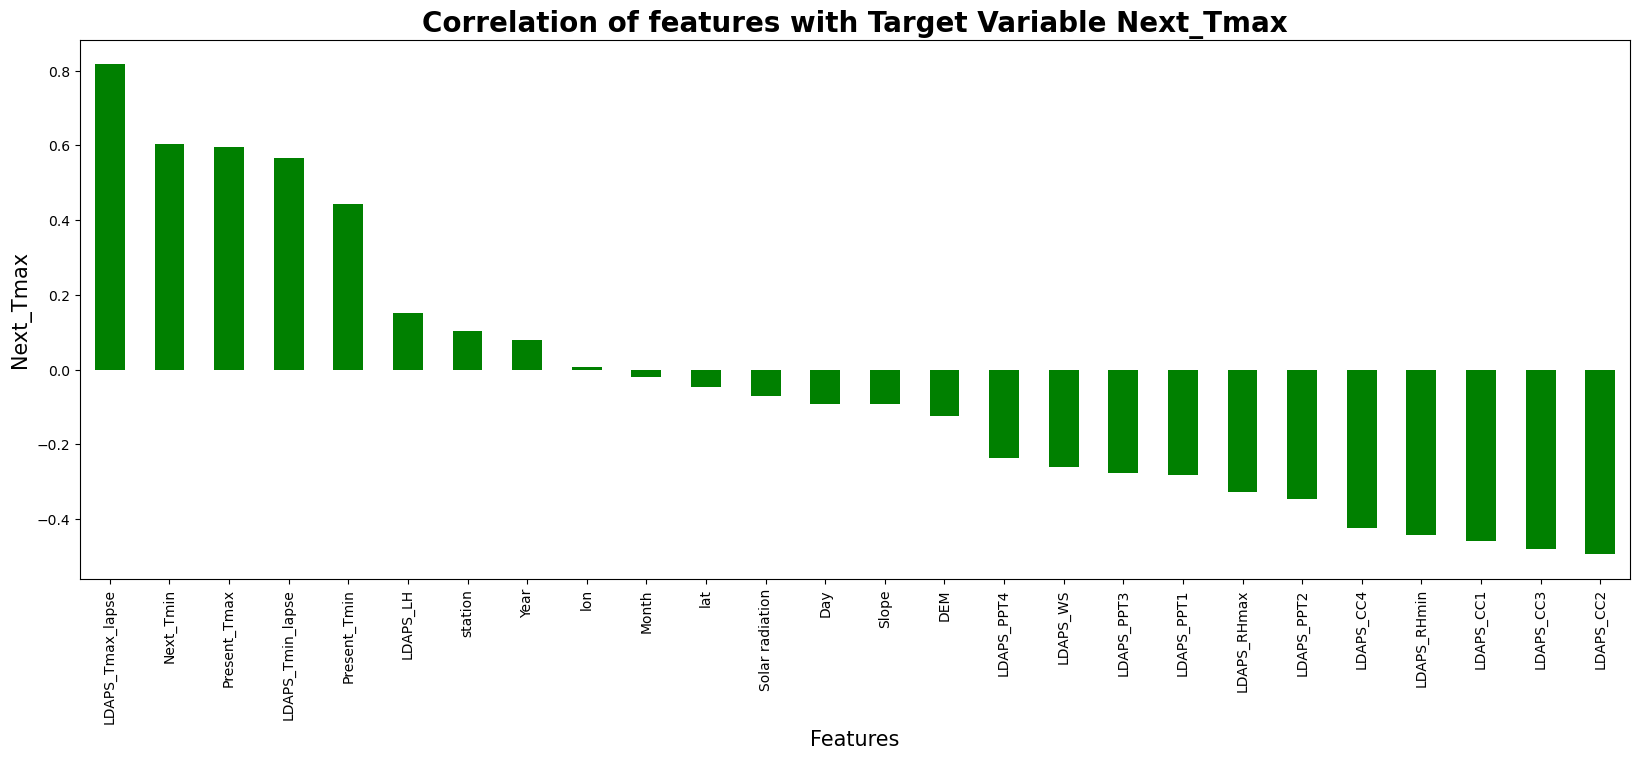

In [35]:
plt.figure(figsize = (20,7))
df.corr()['Next_Tmax'].drop(['Next_Tmax']).sort_values(ascending=False).plot(kind='bar',color = 'green')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Next_Tmax',fontsize=15)
plt.title('Correlation of features with Target Variable Next_Tmax',fontsize = 20,fontweight='bold')
plt.show()

In [36]:
x = df.drop(['Next_Tmax'], axis =1)
y = df['Next_Tmax']

In [37]:
scaler= StandardScaler()
x= scaler.fit_transform(x)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 42)

## model building

In [41]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=i  )
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print(" max r2 score : ",maxacc," on random state ", maxrs)

 max r2 score :  0.797723827978097  on random state  30


In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=maxrs   )

In [43]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print("r2 score :", r2_score(y_test,pred_LR))
print(" r2 score on training data :",r2_score(y_train,pred_train)*100)
print(" MAE : ",mean_absolute_error(y_test,pred_LR))
print(" MSE :",mean_squared_error(y_test,pred_LR))
print("rmse :",np.sqrt(mean_squared_error(y_test,pred_LR)))

r2 score : 0.797723827978097
 r2 score on training data : 77.3182951682732
 MAE :  1.0694879214248392
 MSE : 1.938710604695297
rmse : 1.3923758848440664


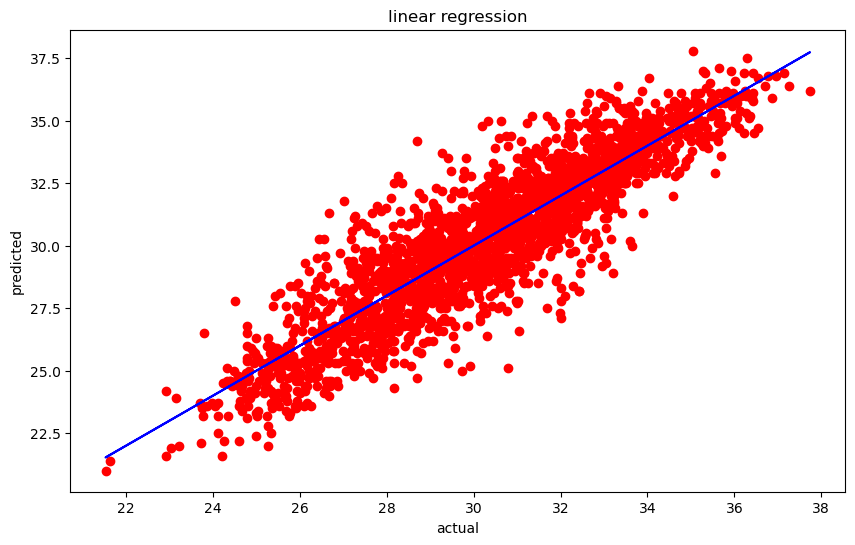

In [44]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("linear regression")
plt.show()

In [45]:
model={'dt':DecisionTreeRegressor(),'rf':RandomForestRegressor(),'lR': LinearRegression(),
       'svr': SVR(),'knn':KNeighborsRegressor(),'rid':Ridge(),'ls':Lasso(),'gb':GradientBoostingRegressor(),'et':ExtraTreesRegressor(),}     
print(model)

{'dt': DecisionTreeRegressor(), 'rf': RandomForestRegressor(), 'lR': LinearRegression(), 'svr': SVR(), 'knn': KNeighborsRegressor(), 'rid': Ridge(), 'ls': Lasso(), 'gb': GradientBoostingRegressor(), 'et': ExtraTreesRegressor()}


In [46]:
y_preds = {}
for key, value in model.items():
    value.fit(x_train, y_train)
    y_pred = value.predict(x_test)
    y_preds[key] = y_pred
y_pred

array([25.69      , 26.421     , 31.868     , ..., 28.181     ,
       30.75274887, 28.857     ])

In [47]:
mae = {}
mse = {}
r2 = {}
rmse = {}

for key, value in model.items():
    y_pred = value.predict(x_test)
    
    mae[key] = mean_absolute_error(y_test, y_pred)
    mse[key] = mean_squared_error(y_test, y_pred)
    r2[key] = r2_score(y_test, y_pred)
    rmse[key] = np.sqrt(mse[key])

details = pd.DataFrame({
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2,
})

print("\nDetails for each model:")
print(details)



Details for each model:
          MAE       MSE      RMSE        R2
dt   1.007752  1.973257  1.404727  0.794119
rf   0.671568  0.808948  0.899415  0.915598
lR   1.069488  1.938711  1.392376  0.797724
svr  0.715789  0.943775  0.971481  0.901531
knn  0.756431  0.987729  0.993845  0.896945
rid  1.069448  1.938582  1.392330  0.797737
ls   1.627780  4.086832  2.021591  0.573599
gb   0.855238  1.236486  1.111974  0.870991
et   0.578825  0.614304  0.783775  0.935906


Great we got least difference e in case of ExtraTreesRegressor algorithm, hence I am selecting it as our best suitable algorithm for final model.

In [48]:
model_1 = ExtraTreesRegressor(max_depth = 20, n_estimators = 500, min_samples_split = 2)
model_1.fit(x_train,y_train)
y_pred = model_1.predict(x_train)
pred = model_1.predict(x_test)

mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred)
print("MAE :", mae)
print('MAE :',mse )
print("RMSE :", rmse)

print("\nTraining r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"\nTesting r2 Score: {r2_score(y_test,pred)*100}%")

MAE : 0.5752916608161999
MAE : 0.6030877521661681
RMSE : 0.7765872469762609

Training r2 Score : 99.98343414591433 %

Testing r2 Score: 93.70765901800803%


,Y Test,Pred
327,25.5,25.559211
330,26.5,26.419553
492,33.0,31.902781
4750,23.2,23.393921
6128,25.9,25.475500


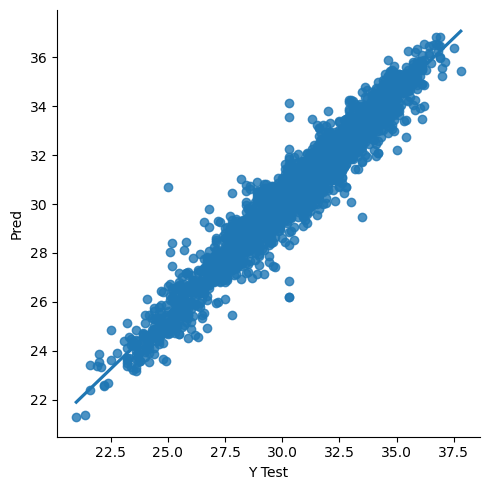

In [49]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

In [50]:
import joblib
joblib.dump(model_1,"Next_Tmax_prediction.pkl")

['Next_Tmax_prediction.pkl']

# Next_Tmin

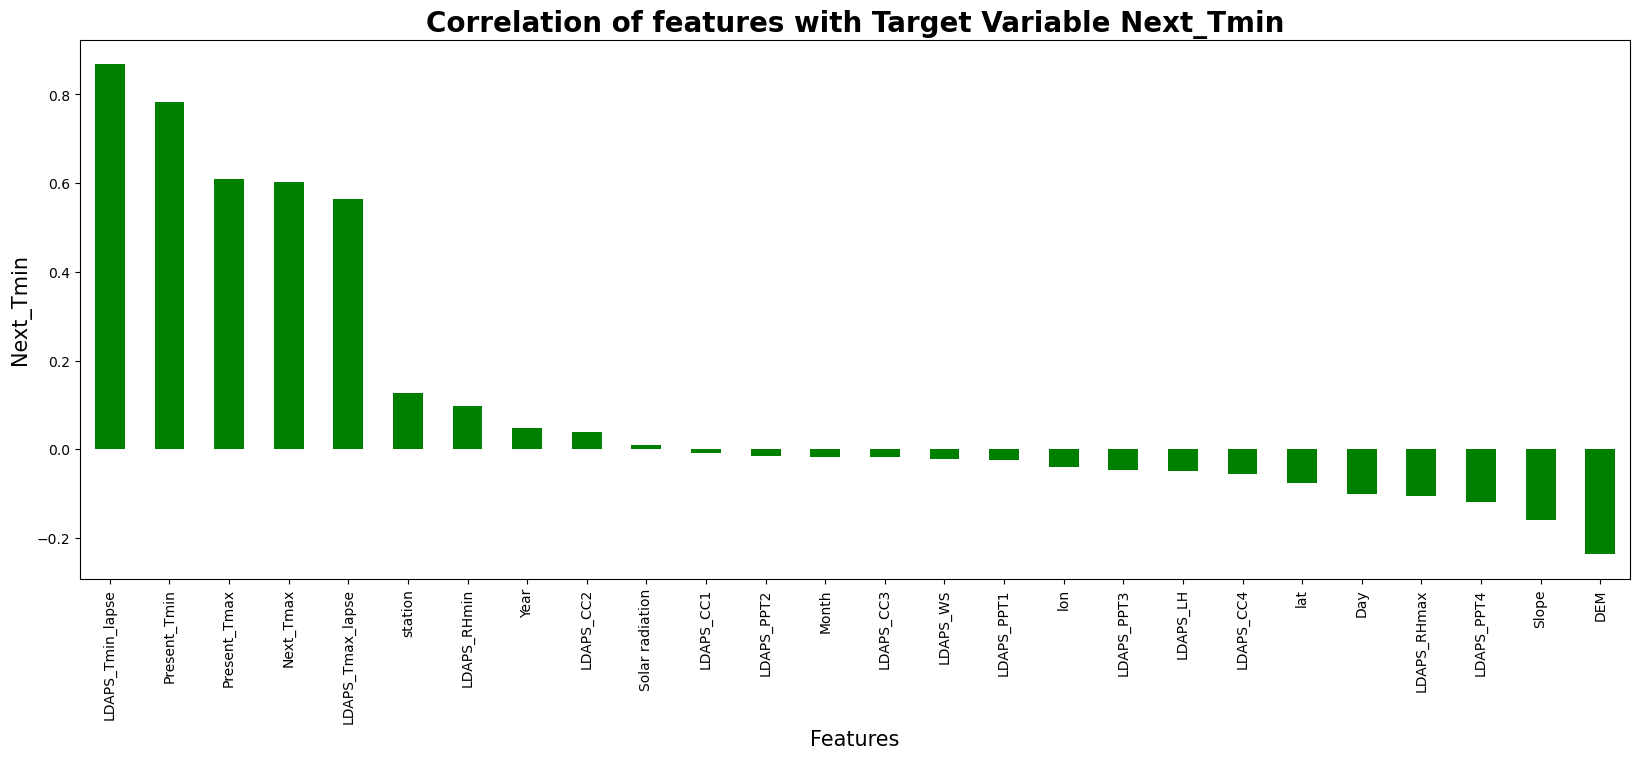

In [51]:
plt.figure(figsize = (20,7))
df.corr()['Next_Tmin'].drop(['Next_Tmin']).sort_values(ascending=False).plot(kind='bar',color = 'green')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Next_Tmin',fontsize=15)
plt.title('Correlation of features with Target Variable Next_Tmin',fontsize = 20,fontweight='bold')
plt.show()

In [52]:
x = df.drop(['Next_Tmin'], axis =1)
y = df['Next_Tmin']

In [53]:
scaler= StandardScaler()
x= scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 42)

MODEL BUILDING

In [55]:
y_preds = {}
for key, value in model.items():
    value.fit(x_train, y_train)
    y_pred = value.predict(x_test)
    y_preds[key] = y_pred
y_pred

array([22.382    , 23.8189332, 22.6903222, ..., 25.299    , 25.696    ,
       19.068    ])

In [56]:
mae = {}
mse = {}
r2 = {}
rmse = {}

for key, value in model.items():
    y_pred = value.predict(x_test)
    
    mae[key] = mean_absolute_error(y_test, y_pred)
    mse[key] = mean_squared_error(y_test, y_pred)
    r2[key] = r2_score(y_test, y_pred)
    rmse[key] = np.sqrt(mse[key])

details = pd.DataFrame({
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2,
})

print("\nDetails for each model:")
print(details)


Details for each model:
          MAE       MSE      RMSE        R2
dt   0.799480  1.154085  1.074283  0.793095
rf   0.549960  0.526300  0.725465  0.905645
lR   0.761026  0.910761  0.954338  0.836718
svr  0.489263  0.424638  0.651642  0.923871
knn  0.642533  0.702801  0.838332  0.874002
rid  0.761026  0.910746  0.954330  0.836721
ls   1.201616  2.250244  1.500081  0.596575
gb   0.615035  0.612411  0.782567  0.890207
et   0.513551  0.460416  0.678540  0.917456


In [57]:
model_1 = ExtraTreesRegressor(max_depth = 20, n_estimators = 500, min_samples_split = 2)
model_1.fit(x_train,y_train)
y_pred = model_1.predict(x_train)
pred = model_1.predict(x_test)

mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred)
print("MAE :", mae)
print('MAE :',mse )
print("RMSE :", rmse)

print("\nTraining r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"\nTesting r2 Score: {r2_score(y_test,pred)*100}%")

MAE : 0.5110649317884681
MAE : 0.45786866143200833
RMSE : 0.676659930417051

Training r2 Score : 99.98023395450907 %

Testing r2 Score: 91.79130488289015%


,Y Test,Pred
7587,22.1,22.351366
7562,24.6,23.855480
2469,22.4,22.684703
4534,17.9,19.199093
2987,21.2,20.356269


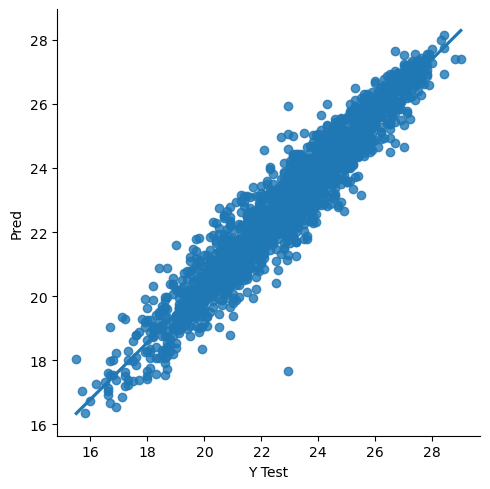

In [58]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

In [59]:
import joblib
joblib.dump(model_1,"Next_Tmin_prediction.pkl")

['Next_Tmin_prediction.pkl']